In [1]:
# 数据集路径
dataset_root = r"C:\Users\wenzh\PycharmProjects\smart-pred\datasets\AzureFunctionsInvocationTraceForTwoWeeksJan2021"

# txt文件路径
import os
txt_path = os.path.join(dataset_root, "AzureFunctionsInvocationTraceForTwoWeeksJan2021.txt")

# pandas加载数据, 第一行是app,func,end_timestamp,duration
import pandas as pd
df = pd.read_csv(txt_path, sep=",", header=0)


In [2]:
df.head()

,app,func,end_timestamp,duration
0,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,e3cdb48830f66eb8689cc0223514569a69812b77e6611e...,0.079491,0.078
1,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,337cd24a7d5fd5c92460faee4ebe6a186a0eb322bd17b7...,57.157860,57.154
2,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,48cc770d590d3c5a7691b3b4e9302f82ec3be5ddc2a037...,59.130478,59.125
3,f274d71de386ccc77e4ca74766dbc485461c3053059d47...,3d2aee54a133509f16fb636d74128c2adcfcac71c6dcef...,6.252541,6.236
4,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,68bbfd828223a505d7917339f4656c5f33ff93225cdb9d...,0.066824,0.050


In [2]:
# 查看一共有多少个app
app_list = df["app"].unique()
num_of_app = len(df["app"].unique())

# 打印
print("一共有{}个app".format(num_of_app))

一共有119个app


# 对每一个app，查看有多少个func

In [3]:
# 对每一个app，查看有多少个func
num_of_func_per_app_list = []
for app in app_list:
    func_list = df[df["app"] == app]["func"].unique()
    num_of_func = len(func_list)
    num_of_func_per_app_list.append(num_of_func)
    print("app {} 有{}个func".format(app, num_of_func))

app 7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de05270735055950a568 有12个func
app 1573b95c039e51cc012b543a4af3bc7c3ee9485acbb0033ba5648b74969e0556 有5个func
app f274d71de386ccc77e4ca74766dbc485461c3053059d47266463c45ec92001b3 有1个func
app f7bfe5bc8d2a37a5c15986fbfc2c477a746e866adcb9663f9df7535b61c3eb9b 有1个func
app 85479ef37b5dc75dd5aeca3bab499129b97a134dac5d740d2c68941de9d63031 有9个func
app 938e7f49544b3293cd6cc7ec3e63e1751085cf5cb6a004dcc9e94543934f607b 有4个func
app 734272c01926d19690e5ec308bab64ef97950b75b1c7582283e0783fce1751d8 有10个func
app 18ed3ca44bd1f7d411f1d047ed8cf38853fb184196afa59e91e68e5d06fda834 有6个func
app 17c37a0fdd5d1932b755c0e6447137bc08fd524f455e14fdac414f584de08dc5 有2个func
app 7fa05b607ae861b85ec53cea12d3efaed8be0f9a92f5d6e8067244161d491e96 有1个func
app db6be4a997f386b37c6246aaeecf81ab81562db84cf4c0d44907d9df2d0ab9fc 有1个func
app c8c43e1a911f29e5506460a2fbef61ff39723d672f3b3b67d12d4c236c6872f7 有4个func
app dd81ee53ae84624a29382a50941b34a66e83f308edb4a30668ae4e7a1d40a418 有1个fu

# 画一下不同app下，function数目的CDF分布图

图片保存到:./num_of_func_per_app_cdf.pdf


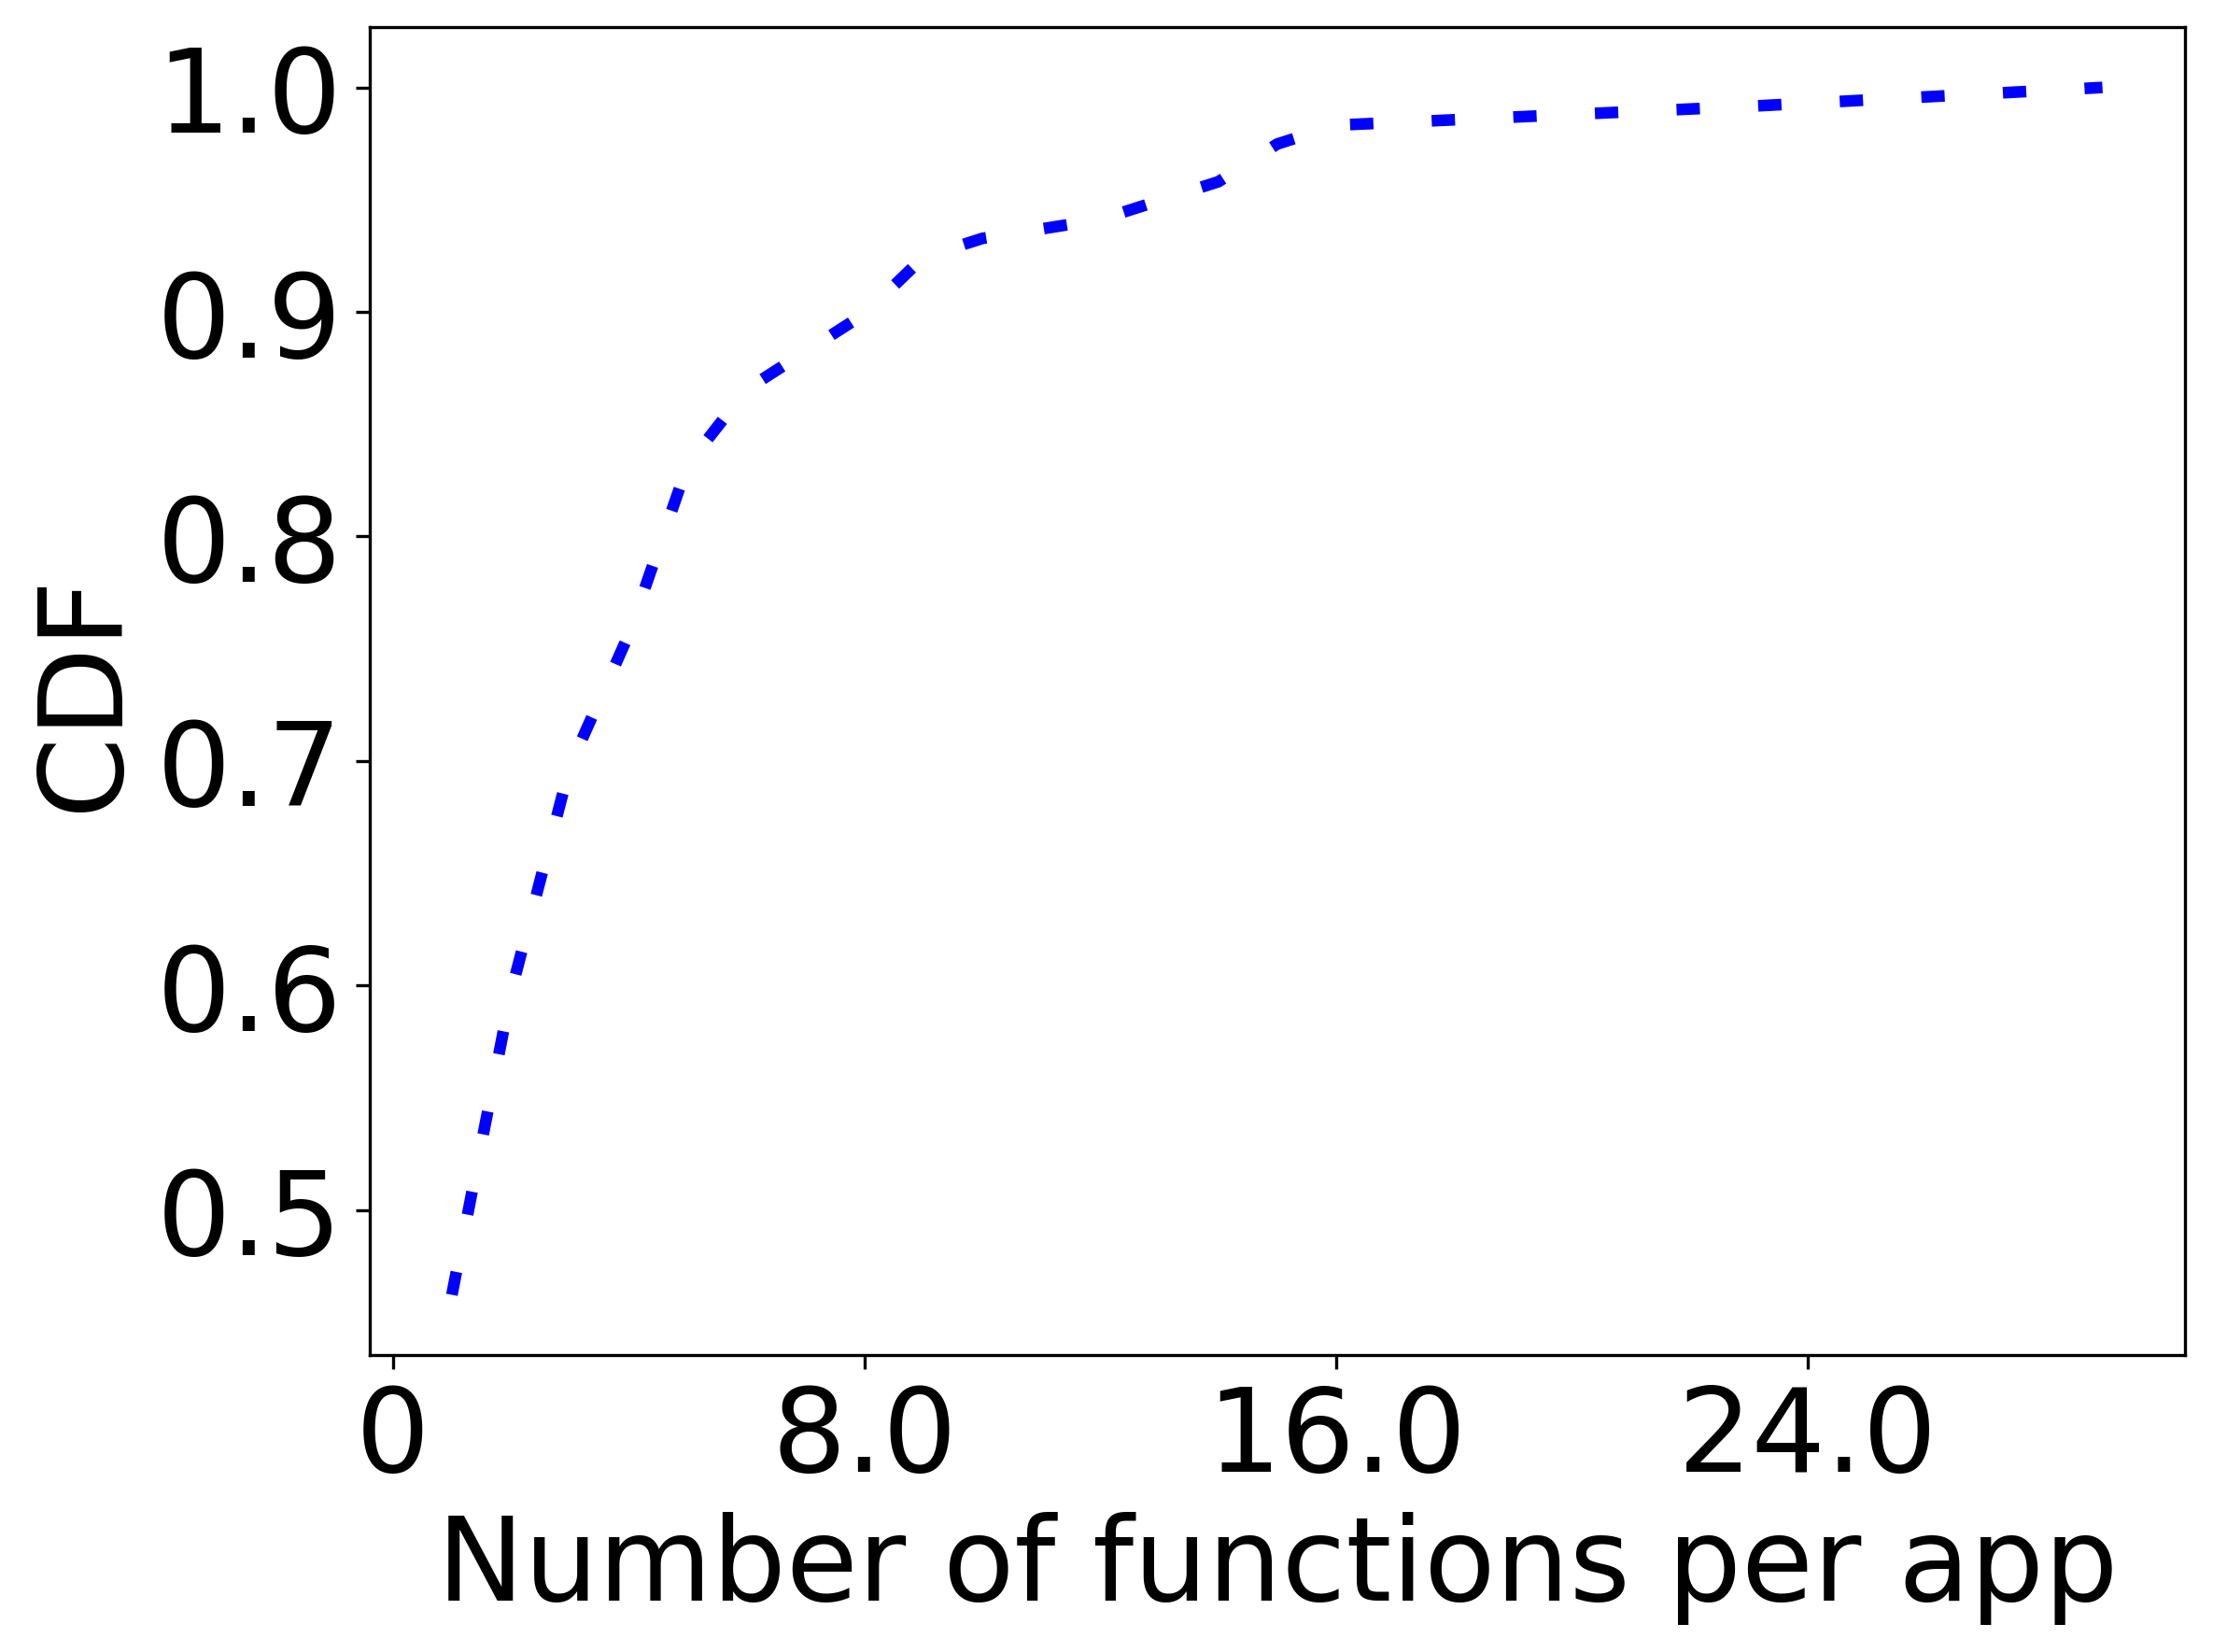

In [4]:
# 画一下num_of_func_per_app_list的CDF
from py_plotter.plot import Plotter
my_plotter = Plotter(
    figsize=(8, 6),
    fontsize=30,
)

cdf_data_list = []

cdf_data = num_of_func_per_app_list
cdf_data_list.append(cdf_data)

my_plotter.plot_cdfs(
    linewidth=3,
    num_y_ticks=6,
    is_no_legend=True,
    x_label="Number of functions per app",
    y_label="CDF",
    legend_label_list=[""],
    cdf_data_list=cdf_data_list,
    legend_title="",
    filename="num_of_func_per_app_cdf.pdf",
    is_show=True,
)

In [9]:
# 统计每一个数量的func的app有多少个
from collections import Counter
counter = Counter(num_of_func_per_app_list)
print(counter)


Counter({1: 55, 2: 16, 3: 12, 5: 9, 4: 7, 6: 4, 9: 3, 8: 2, 15: 2, 7: 2, 12: 1, 10: 1, 29: 1, 23: 1, 14: 1, 16: 1, 13: 1})


In [10]:
# 筛选出func数量小于等于10的app，绘制一下这些function调用的时间序列
import numpy as np
import matplotlib.pyplot as plt
from py_plotter.plot import Plotter
my_plotter = Plotter(
    figsize=(8, 6),
    fontsize=30,
)

# 筛选出func数量大于等于2且小于等于10的app
app_list = df["app"].unique()
app_list = list(app_list)
app_list = [app for app in app_list if len(df[df["app"] == app]["func"].unique()) >= 2 and len(df[df["app"] == app]["func"].unique()) <= 10]

In [8]:
app_list[0]

'1573b95c039e51cc012b543a4af3bc7c3ee9485acbb0033ba5648b74969e0556'

In [11]:
app_name = app_list[0]
# 筛选出app_name的数据
df_app = df[df["app"] == app_name]
# 然后看一下end_timestamp的范围
end_timestamp_list = df_app["end_timestamp"].unique()
end_timestamp_list.sort()

print(f"end_timestamp_list: {end_timestamp_list}")
    

end_timestamp_list: [5.71578600e+01 5.91304779e+01 6.19739060e+01 ... 1.15613681e+06
 1.15614150e+06 1.15615232e+06]


In [12]:
# end_timestamp min max
end_timestamp_min = end_timestamp_list[0]
end_timestamp_max = end_timestamp_list[-1]

print(f"end_timestamp_min: {end_timestamp_min}")
print(f"end_timestamp_max: {end_timestamp_max}")


end_timestamp_min: 57.15786004066467
end_timestamp_max: 1156152.3248770237


In [13]:
# 为df增加一列，表示func被start_timestamp的时间, 值是通过end_timestamp - duration得到的
df["start_timestamp"] = df["end_timestamp"] - df["duration"]

In [14]:
start_timestamp_min = df["start_timestamp"].min()
start_timestamp_max = df["start_timestamp"].max()

print(f"start_timestamp_min: {start_timestamp_min}")
print(f"start_timestamp_max: {start_timestamp_max}")

start_timestamp_min: 0.0014909000396727962
start_timestamp_max: 1209599.6934639686


In [52]:
# 现在需要得到每一个func的调用时间序列
func_name = df_app["func"].unique()[3]
print(f"func_name: {func_name}")

# 我们按照秒来统计
# 首先得到时间序列开始的时间，也就是start_timestamp_min取整
start_timestamp_sec = int(start_timestamp_min)
# 然后得到时间序列结束的时间，也就是end_timestamp_max向上取整
end_timestamp_sec = int(end_timestamp_max) + 1

# 初始化时间序列，初始值都为0
time_series = np.zeros(end_timestamp_sec - start_timestamp_sec)

# 找到func_name的所有数据
df_func = df_app[df_app["func"] == func_name]
 
# 遍历一个func的所有数据，然后将对应的时间序列区间，值加1
for index, row in df_func.iterrows():
    start_timestamp = int(row["start_timestamp"])
    end_timestamp = int(row["end_timestamp"])
    time_series[start_timestamp - start_timestamp_sec:end_timestamp - start_timestamp_sec] += 1


func_name: 4ebfe961fb725aa1b0e95c0f40be44625edbfbbb9b89aa593e23d81211eb3e87


In [53]:
len(time_series) / 3600 / 24

13.381400462962963

In [54]:
# 假设 time_series 是原始的秒级时间序列数组
# 首先，计算需要截断的数据点数量
truncate_size = len(time_series) % 60

# 如果有需要截断的数据点，进行截断
if truncate_size != 0:
    time_series = time_series[:-truncate_size]

# 现在，time_series 的大小可以被60整除
# 重新整形数组并求和
time_series_minute = time_series.reshape(-1, 60).sum(axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


图片保存到:./time_series.pdf


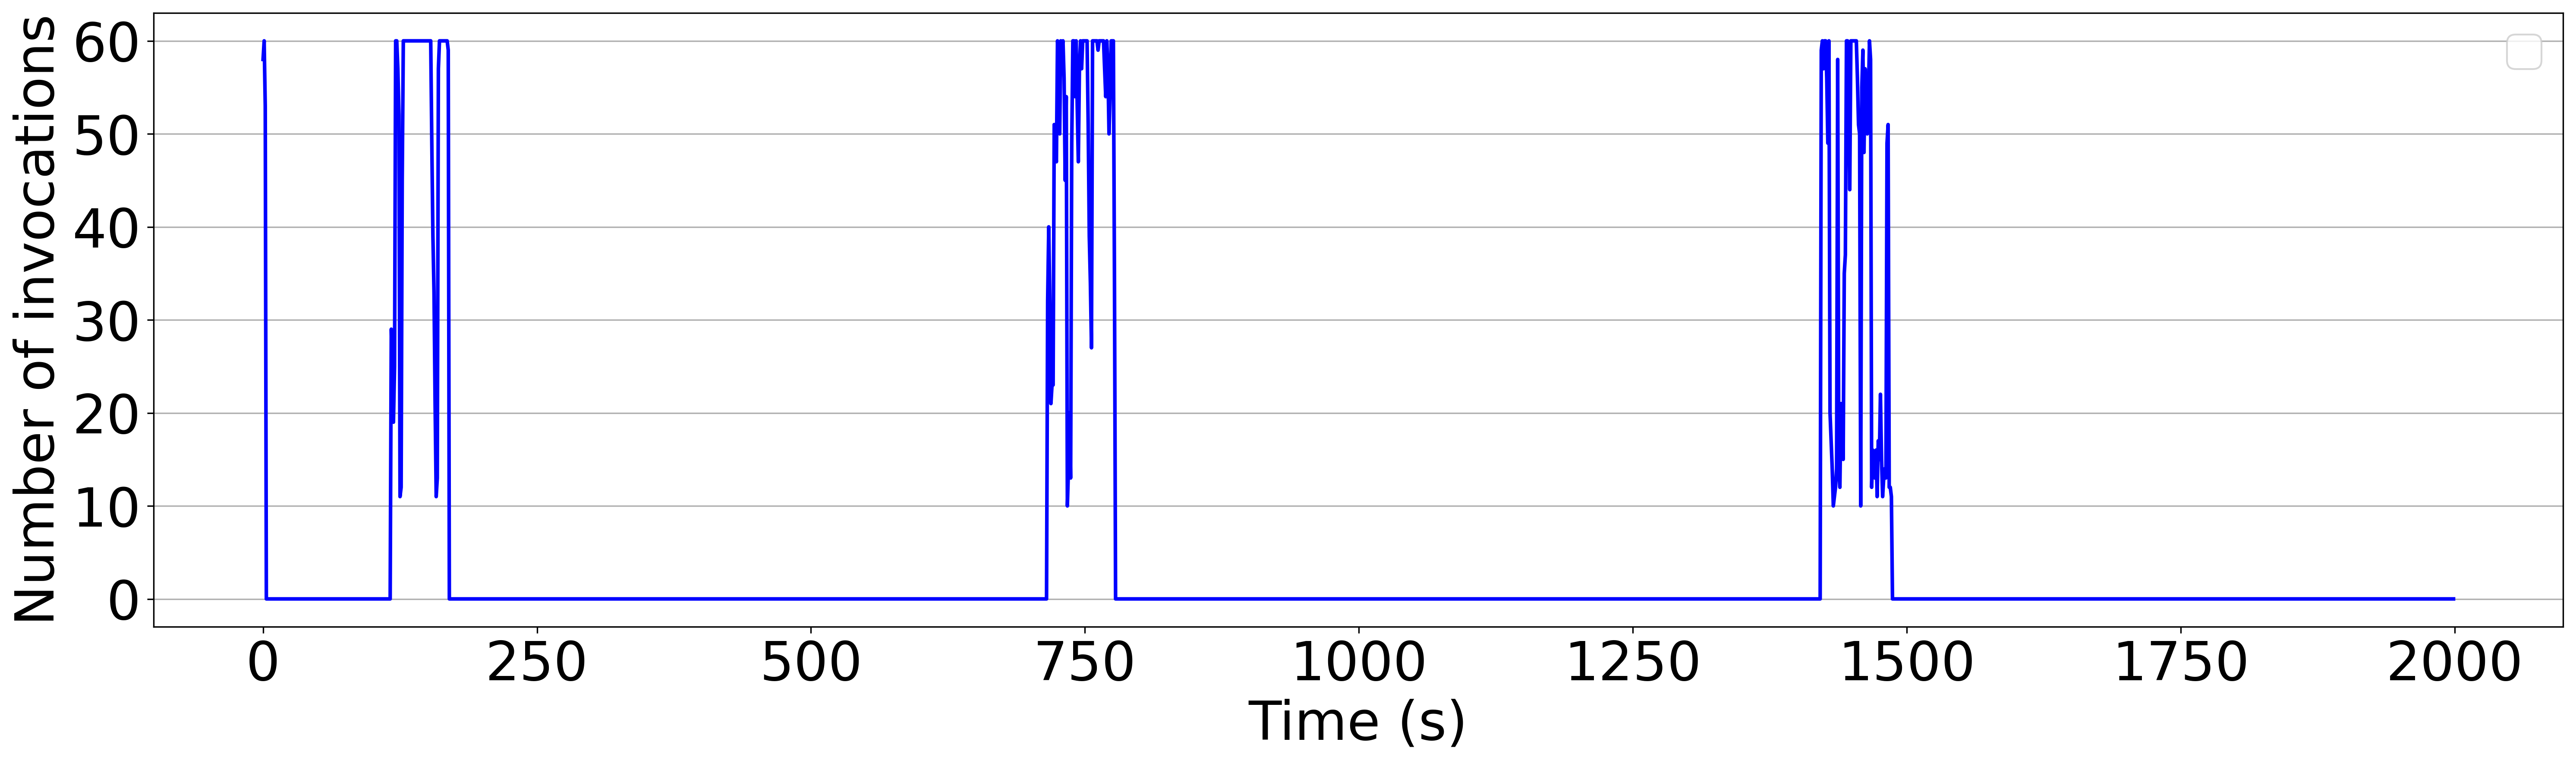

In [55]:
# 只画一个小时的

line_data_list = []
line_data_list.append(time_series_minute[0:2000])

my_plotter = Plotter(
    figsize=(20, 6),
    fontsize=30,
)
    
# 然后画一下这个时间序列
my_plotter.plot_lines(
    line_data_list=line_data_list,
    x_label="Time (s)",
    y_label="Number of invocations",
    legend_label_list=[""],
    legend_title="",
    filename="time_series.pdf",
    x_tick_ndigits=0,
    y_tick_ndigits=0,
    is_show=True,
)


In [15]:
# 统计一下 df 的 duration 的分布
duration_list = df["duration"].unique()
duration_list.sort()

print(f"duration_list: {duration_list}")

duration_list: [0.00000e+00 1.00000e-03 2.00000e-03 ... 5.63503e+02 5.63718e+02
 5.78620e+02]


In [19]:
# 分别统计 10ms 以下，10ms-50ms, 50ms-100ms, 100ms到500ms，500ms到1s，1s到5s，5s到10s，10s以上的数量
duration_list = df["duration"].to_list()


# duration_range_num_dict
duration_range_num_dict = {
    "0-10ms": 0,
    "10ms-50ms": 0,
    "50ms-100ms": 0,
    "100ms-500ms": 0,
    "500ms-1s": 0,
    "1s-5s": 0,
    "5s-10s": 0,
    "10s+": 0,
}

# duration单位是s
for duration in duration_list:
    if duration < 0.01:
        duration_range_num_dict["0-10ms"] += 1
    elif duration < 0.05:
        duration_range_num_dict["10ms-50ms"] += 1
    elif duration < 0.1:
        duration_range_num_dict["50ms-100ms"] += 1
    elif duration < 0.5:
        duration_range_num_dict["100ms-500ms"] += 1
    elif duration < 1:
        duration_range_num_dict["500ms-1s"] += 1
    elif duration < 5:
        duration_range_num_dict["1s-5s"] += 1
    elif duration < 10:
        duration_range_num_dict["5s-10s"] += 1
    else:
        duration_range_num_dict["10s+"] += 1

print(f"duration_range_num_dict: {duration_range_num_dict}")

duration_range_num_dict: {'0-10ms': 778357, '10ms-50ms': 313653, '50ms-100ms': 137938, '100ms-500ms': 383286, '500ms-1s': 118182, '1s-5s': 106781, '5s-10s': 32692, '10s+': 110062}
